<a href="https://colab.research.google.com/github/AlexanderKClark/MAT421/blob/main/MAT421_HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MAT421 HW10 - Alexander Clark
This homework covers the concepts in [22.1-22.3 of the textbook](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter22.00-ODE-Initial-Value-Problems.html), **Initial Value Problem Statement**, **Reduction of Order**, and **The Euler Method**.

## 22.1 Initial Value Problem Statement
A differential equation is a relationship between a function, its independent variable, and some derivative of the function. An ODE is a differential equation where the independent cariable is in one dimension.

Assume that an ODE can be written in the form

$
\begin{equation*}
F\left(x,f(x),\frac{df(x)}{dx},\frac{d^2f(x)}{dx^2},\frac{d^3f(x)}{dx^3},\dots,\frac{d^{n-1}f(x)}{dx^{n-1}}\right)=\frac{d^nf(x)}{dx^n},
\end{equation*}
$

where $F$ is an arbitrary function that incorporates one or all of the input arguments, and $n$ is the order of the differential equation. This equation is referred to as an $\mathbf{\textit{n}^{\operatorname{th}}}$ **order ODE**.

In contrast, a PDE is a general form differential equation where $x$ is a vector containing the independent variables $x_1,x_2,x_3,\dots,x_m$, and the partial derivatives can be of any order and with respect to any combination of variables. An example of a PDE is the heat equation, which describes the evolution of temperature in space over time:

$
\begin{equation*}
\frac{∂u(t,x,y,z)}{∂t}=α\left(\frac{∂u(t,x,y,z)}{∂x}+\frac{∂u(t,x,y,z)}{∂y}+\frac{∂u(t,x,y,z)}{∂z}\right)
\end{equation*}.
$

Here, $u(t,x,y,z)$ is the temperature at $(x,y,z)$ at time $t$ and $\alpha$ is a thermal diffusion constant.

A general solution to a differention equation is a $g(x)$ that satisfies the differential equation. A particular solution is a $p(x)$ that satisfies the differential equation and $n$ explicitly known values of the solution, or its derivatives, at certain points.

A common set of known values for an ODE is the initial value. For an ODE of order $n$, the initial value for the $0^{\operatorname{th}}$ to $(n-1)^{\operatorname{th}}$ derivatives at $x=0,f(0),f^{(1)}(0),f^{(2)}(0),\dots,f^{(n-2)}(0)$.



## 22.2 Reduction of Order
To make many solvers useful for solving higher order differential equations, one often needs to reduce its order.

A simple construction is as follows:

$
\begin{equation*}
S(t)=
\begin{bmatrix}
f(t)\\
f^{(1)}(t)\\
f^{(2)}(t)\\
f^{(3)}(t)\\
\vdots\\
f^{(n-1)}(t)\\
\end{bmatrix}\implies\displaystyle{\frac{dS(t)}{dt}}=
\begin{bmatrix}
f^{(1)}(t)\\
f^{(2)}(t)\\
f^{(3)}(t)\\
f^{(4)}(t)\\
\vdots\\
F(t,f(t),f^{(1)}(t),\dots,f^{(n-1)}(t)
\end{bmatrix}=
\begin{bmatrix}
S_2(t)\\
S_3(t)\\
S_4(t)\\
S_5(t)\\
\vdots\\
F(t,S_1(t),\dots,S_{n-1}(t))
\end{bmatrix},
\end{equation*}
$

where $S_i(t)$ is the $i^{\operatorname{th}}$ element of $S(t)$. With the state written this way, $\frac{dS(t)}{dt}$ can be written using only $S(t)$ (i.e., no $f(t)$) or its derivatives. In particular, $\frac{dS(t)}{dt}=\mathcal{F}(t,S(t))$, where $\mathcal{F}$ is a function that appropriately assembles the vector describing the serivative of the state.

##22.3 The Euler Method
Let $\frac{dS(t)}{dt}=F(t,S(t))$ be an explicitly defined first order ODE. Let $t$ be a numerical grid of the interval $[t_0,t_f]$ with spacing $h$. WLOG, assume that $t_0=0$ and that $t_f=Nh$ for some $N\in\mathbb{N}$. The linear appriximation of $S(t)$ around $t_j$ at $t_{j+1}$ is $S(t_{j+1})=S(t_j)+(t_{j+1}-t_j)\frac{dS(t_j)}{dt}$, which can be written as $S(t_{j+1})S(t_j)+hF(t_j,S(t_j))$. This is the Explicit Euler Formula.

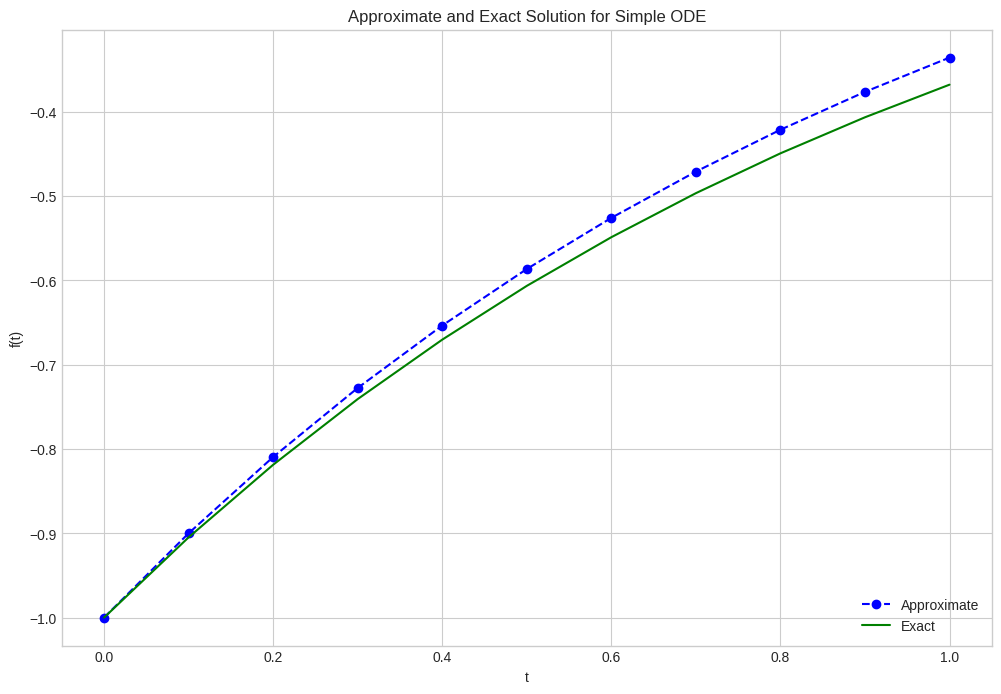

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

# Define parameters
f = lambda t, s: np.exp(-t) # ODE
h = 0.1 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend(loc='lower right')
plt.show()

If we repeat this for $h=0.01$, we get a better aproximation of the solution.

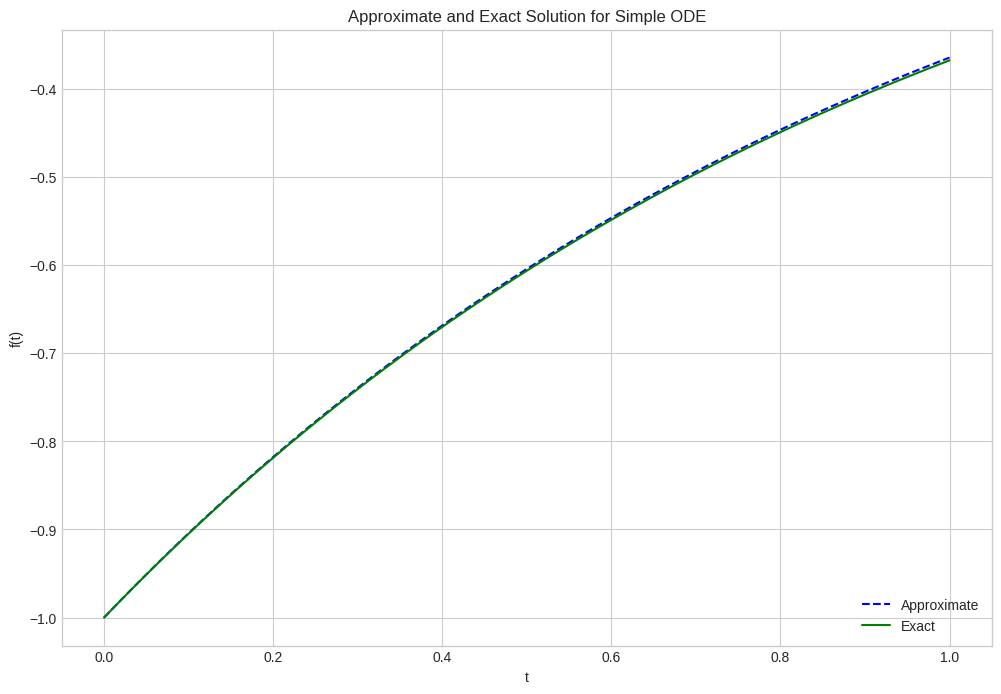

In [12]:
h = 0.01 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'b--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend(loc='lower right')
plt.show()